<a href="https://colab.research.google.com/github/zenikigai/Pengembangan_Machine_Learning_IDcamp2023/blob/main/Membuat_Model_NLP_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subject: Membuat Model NLP dengan TensorFlow

this task was valued 4 starts

In [1]:
!gdown 1pQMBSmnaqgoDaMVNKHIqsTJDqf9EiFQ9

Downloading...
From: https://drive.google.com/uc?id=1pQMBSmnaqgoDaMVNKHIqsTJDqf9EiFQ9
To: /content/Restaurant reviews.csv
100% 3.59M/3.59M [00:00<00:00, 146MB/s]


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load dataset (replace with your file path)
df = pd.read_csv("Restaurant reviews.csv")
print(df)

            Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                        

In [4]:
df["Review"] = df["Review"].astype(str)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df = df.dropna(subset=["Rating"])
df.loc[:, "Sentiment"] = df["Rating"].apply(lambda x: 1 if x > 3.5 else 0)

<ipython-input-4-f3229e57319e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Sentiment"] = df["Rating"].apply(lambda x: 1 if x > 3.5 else 0)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    df["Review"],
    df["Sentiment"],
    test_size=0.2,
    random_state=42
)

In [13]:
max_words = 10000
max_len = 50

X_train = X_train.astype(str)
X_val = X_val.astype(str)

X_train_list = X_train.tolist()
X_val_list = X_val.tolist()

In [19]:
tokenizer = Tokenizer(num_words=max_words, oov_token="<oov>")
tokenizer.fit_on_texts(X_train_list)

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train_list), maxlen=max_len)
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val_list), maxlen=max_len)

In [22]:
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [23]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.5),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    BatchNormalization(),
    LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(2, activation="softmax")
])

In [25]:
optimizer = Adam( learning_rate=0.001 )
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
  )

In [26]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
  )

In [27]:
epochs = 20
batch_size = 32

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

train_loss, train_accuracy = model.evaluate(X_train, y_train)
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/20
249/249 [==============================] - 35s 115ms/step - loss: 2.6723 - accuracy: 0.6894 - val_loss: 1.5802 - val_accuracy: 0.6458
Epoch 2/20
249/249 [==============================] - 28s 111ms/step - loss: 1.0733 - accuracy: 0.8394 - val_loss: 0.7837 - val_accuracy: 0.8530
Epoch 3/20
249/249 [==============================] - 26s 106ms/step - loss: 0.6221 - accuracy: 0.8838 - val_loss: 0.5147 - val_accuracy: 0.8886
Epoch 4/20
249/249 [==============================] - 28s 111ms/step - loss: 0.4234 - accuracy: 0.8998 - val_loss: 0.4461 - val_accuracy: 0.8600
Epoch 5/20
249/249 [==============================] - 28s 112ms/step - loss: 0.3355 - accuracy: 0.9109 - val_loss: 0.3736 - val_accuracy: 0.8856
Epoch 6/20
63/63 [==============================] - 1s 23ms/step - loss: 0.5147 - accuracy: 0.8886
Training Loss: 0.4456
Training Accuracy: 0.9345
Validation Loss: 0.5147
Validation Accuracy: 0.8886


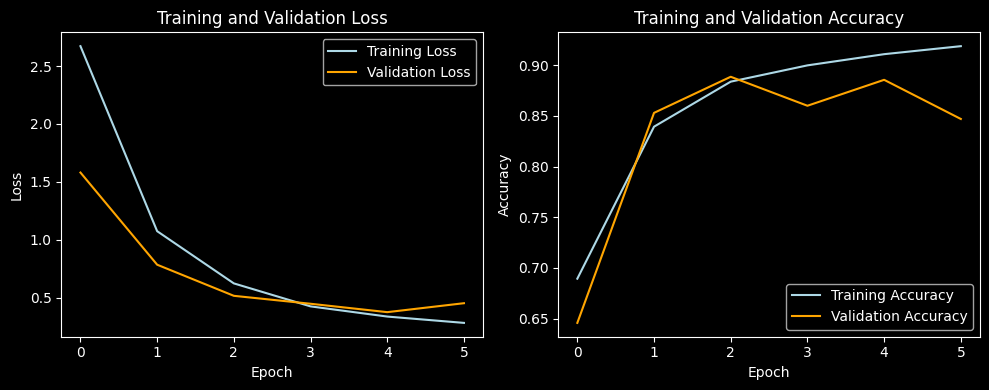

In [28]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='lightblue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='lightblue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()

plt.savefig('training_plot.png', dpi=150, bbox_inches='tight')
plt.show()